# Luther Challenge

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import gzip
import requests

In [93]:
with gzip.open('/Users/ingrid/Desktop/METIS/Projects/Luther/movie_data/data/ratings.list.gz', 'rb') as f:
    content = f.read().decode('latin-1')

In [94]:
lines = content.split('\n')

In [ ]:
import re

def match_line(i,line):
    floating_point = "[0-9]*\.?[0-9]*"
    integer_dots = "[0-9\.\*]+"
    integer = "[0-9]+"
    
    try:
        match = re.match('\s*('+integer_dots+')\s+('+integer+')\s+('+floating_point+')\s*(.+)', line).groups()
        return match
    except:
        print str(i) + ":" + line
        raise 

In [ ]:
top250 = lines[28:278]
top250_tuples = [match_line(i, line) for i, line in enumerate(top250)]
top_250_df = pd.DataFrame(top250_tuples)
top250_tuples = [match_line(i, line) for i, line in enumerate(top250)]

In [131]:
all_movies = lines[296:679918]
all_tuples = [match_line(i,line) for i,line in enumerate(all_movies)]
all_df = pd.DataFrame(all_tuples) 

In [128]:
all_df.sort_values(by=2, ascending=False).head()

,0,1,2,3
48297,.......0.9,16,9.9,"""Comedy.TV"" (2010) {(#1.12)}"
276625,........18,15,9.9,"""The Wedding Bells"" (2007) {Wedding from Hell ..."
480959,........18,9,9.9,Last Call (2010/III)
343797,........19,10,9.9,Best Friend Accepted (2015)
348379,....0....9,99,9.9,Blind Paris (2014)


In [274]:
df = pd.read_csv('/Users/ingrid/Desktop/METIS/Projects/Luther/movie_data/moviedata.csv', header=0)

In [309]:
#t478f8de5776c799de5a
#x4n8nw6qwszpu39ekappre48

url = "http://api.rottentomatoes.com/api/public/v1.0/movies.json?apikey=[t478f8de5776c799de5a]&q=Toy+Story+3&page_limit=1"
r = requests.get(url)

In [310]:
r.json()

{u'error': u'Account Inactive'}

In [252]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'].values,format="%Y-%m-%d %X")
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14


## Challenge 1

Plot domestic total gross over time

In [245]:
ts = pd.Series(df.DomesticTotalGross.values, index = df.ReleaseDate)

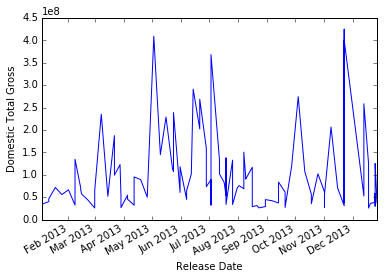

In [272]:
ax = ts.plot()
ax.set_xlabel('Release Date')
ax.set_ylabel('Domestic Total Gross')
### order by date and not by value

[None, None, None, None, None, None, None, None, None, None, None]

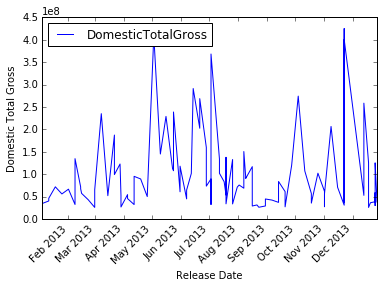

In [237]:
ax = df.plot(x='ReleaseDate', y='DomesticTotalGross')
ax.set_xlabel('Release Date')
ax.set_ylabel('Domestic Total Gross')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

## todo: 
### remove time from date
### as single points

## Challenge 2

Plot runtime vs. domestic total gross.

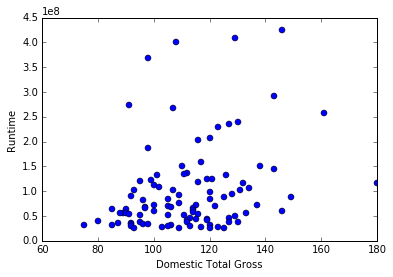

In [45]:
plt.ylabel('Runtime')
plt.xlabel('Domestic Total Gross')
plt.plot(df.Runtime,df.DomesticTotalGross,'o')

## Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating

In [268]:
grouped = df.groupby('Rating')
rating_averages = grouped.aggregate(np.mean).reset_index()
rating_averages.head()

,Rating,Budget,DomesticTotalGross,Runtime
0,G,NaN,2.684928e+08,107.000000
1,PG,93933333.333333,1.311357e+08,99.933333
2,PG-13,96609756.097561,1.114498e+08,117.510638
3,R,38863636.363636,6.989243e+07,110.729730


In [146]:
rating_averages = grouped.aggregate({'DomesticTotalGross':'mean', 'Runtime':'mean'}).reset_index()
rating_averages.head()


,Rating,Runtime,DomesticTotalGross
0,G,107.000000,268492764
1,PG,99.933333,131135716
2,PG-13,117.510638,111449769
3,R,110.729730,69892429


## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross

/Users/ingrid/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_base.py:2767: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


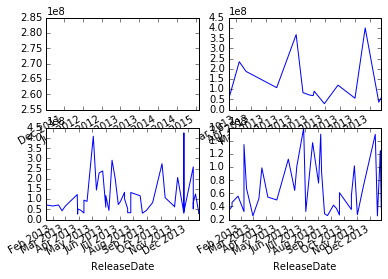

In [269]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axis = [[0,0],[0,1],[1,0],[1,1]]
i = 0
for name, group in grouped:
    group.plot(x='ReleaseDate',y='DomesticTotalGross',ax=axes[axis[i][0],axis[i][1]],legend=False) 
    i+=1
## to do : 
### x-axis label with ,xticks=group.ReleaseDate; datetime object???
### Title, x, y axis labels
### order by date!

## Challenge 5

What director in your dataset has the highest gross per movie?

In [144]:
director_groups = df.groupby("Director")

In [157]:
sorted_directors = director_groups.aggregate({'DomesticTotalGross':'mean'}).reset_index().sort_values(by='DomesticTotalGross',ascending=False)

In [261]:
sorted_directors.head()

,Director,DomesticTotalGross
27,Francis Lawrence,424668047
81,Shane Black,409013994
15,Chris BuckJennifer Lee,400738009
71,Pierre CoffinChris Renaud,368061265
92,Zack Snyder,291045518


In [253]:
sorted_directors.iloc[0][0]

'Francis Lawrence'

Director              Zack Snyder
DomesticTotalGross      424668047
dtype: object

## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

[None, None, None, None, None, None, None, None, None, None, None, None]

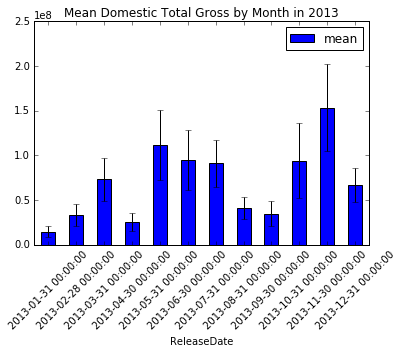

In [270]:
resampled = ts.resample('M',how={'mean': np.std,'std':'sem'}).reset_index()
ax = resampled.plot(kind='bar',x = 'ReleaseDate',y='mean', yerr='std',title='Mean Domestic Total Gross by Month in 2013')             
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

# std error is how much does the mean vary
# std dev is how much does the data vary

In [218]:
resampled

,ReleaseDate,std,mean
0,2013-01-31,1.465947e+07,6555914.034601
1,2013-02-28,3.283185e+07,12409272.366783
2,2013-03-31,7.323942e+07,24413138.904748
3,2013-04-30,2.530104e+07,10329105.790812
4,2013-05-31,1.117754e+08,39518588.373287
5,2013-06-30,9.519994e+07,33658260.210311
6,2013-07-31,9.140837e+07,26387322.106470
7,2013-08-31,4.132232e+07,12459149.013074
8,2013-09-30,3.482327e+07,14216539.945168
9,2013-10-31,9.394330e+07,42012719.253831
